Welcome to the fourth Lab session of the "Advanced algorithmics and graph theory with Python" MOOC. In this exercise you will learn how to find solutions to the Traveling Salesman Problem.

The main objective of this exercise is to:
* Describe the classic traveling salesman problem and use it as a reduction for other problems.
* Write functions to solve a problem NP-complete using backtracking.

Based on what we learned in the previous exercices, we will define advanced functions and use them to define the Traveling Salesman algorithm.

## List manipulation

Before starting this session we will do a quick recap on list manipulation with python.

We would like to point out a major difference between the '+' operator that concatenate two lists and the append function. As a matter of fact, using '+' operator creates a new list that is the concatenation of the two given lists and therefore does not modify the input list, whereas the append function modifies the initial list.

Let us illustrate:

In [33]:
input_list=[3,5,4,1,0,7]

#add a new element to the list using both methods
print("We first use '+' to generate a new list containing the new element and the input list")
output_list=input_list+[8]
print("the output list is: ")
print(output_list)
print("input list is: ")
print(input_list)
print("The element was added only to the output_list not to the input list")

input_list=[3,5,4,1,0,7]
print("Now we use append function to add an element to the list")
input_list.append(8)
print("input list is: ")
print(input_list)
print("The element was added to input_list")


We first use '+' to generate a new list containing the new element and the input list
the output list is: 
[3, 5, 4, 1, 0, 7, 8]
input list is: 
[3, 5, 4, 1, 0, 7]
The element was added only to the output_list not to the input list
Now we use append function to add an element to the list
input list is: 
[3, 5, 4, 1, 0, 7, 8]
The element was added to input_list


## Exercise A (1pt)

We will first define our metagraph. To do this the first thing we need to define are the vertices of our metagraph. These vertices are the positions of the cheeses in the maze and the player position. 

The function we are going to define is create_vertices_meta_graph. This function takes two inputs, a list of vertices 'pieces_of_cheese', which contains the positions of cheeses in the maze, and a vertex 'player_position' which contains the position of the player in the maze. 

This function returns a list containing 'piece_of_cheese' elements and 'player_position', but does not modify the list 'piece_of_cheese'.

In [34]:
def create_vertices_meta_graph(piece_of_cheese, player_location):
    #
    # YOUR CODE HERE
    #
    return piece_of_cheese + [ player_location ]


In [35]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#

piece_of_cheese=[(3,4),(1,2),(5,4),(0,3),(8,9)]
player_position=(0,1)
vertices_meta_graph=create_vertices_meta_graph(piece_of_cheese, player_position)

print("Positions of pieces of cheese are:")
print(sorted(piece_of_cheese)) # we add sorted in order to always get the same result.
print("Player position is:")
print(player_position)
print("The vertices of the meta graph are:")
print(sorted(vertices_meta_graph)) #  The player position can be add at any position in the list, so we add sorted in order to always get the same result. 

Positions of pieces of cheese are:
[(0, 3), (1, 2), (3, 4), (5, 4), (8, 9)]
Player position is:
(0, 1)
The vertices of the meta graph are:
[(0, 1), (0, 3), (1, 2), (3, 4), (5, 4), (8, 9)]


The obtained result after executing the cell above should be:
```
Positions of pieces of cheese are:
[(0, 3), (1, 2), (3, 4), (5, 4), (8, 9)]
Player position is:
(0, 1)
The vertices of the meta graph are:
[(0, 1), (0, 3), (1, 2), (3, 4), (5, 4), (8, 9)]
```

## Exercice B (1pt)

With the vertices defined we now need to connect them with weighted edges. To do this we are going to define the create_edge_weight_maze_graph function.

This function has two inputs, 'maze_graph' and 'vertices', and returns an adjacency matrix containing distances between each pair of vertices in the meta graph. Note that for the moment we are only interested in the shortest distance, but we disregard the corresponding shortest path.

Tip: You don't need to recode the Dijkstra function or to copy the code from Lab 3. The Dijkstra functions is already defined in the utils package and can be called as follows:

utils.Dijkstra(maze_graph,initial_vertex).

This function returns an array containing three elements:

    1. an array containing the explored vertices in the order that they were explored
    2. the parent dictionary containing the source vertex for each one of the vertices of the maze.
    3. a dictionary where each key is a vertex on the maze graph and each value is the distance from the initial vertex to the given vertex

In [36]:
import utils

def create_edge_weight_maze_graph(maze_graph,vertices):
    adjacency_matrix={}
    # for each initial_vertex in vertices:
    for initial_vertex in vertices:
        _, _, distancemap = utils.Dijkstra(maze_graph, initial_vertex)
        result = { v : distancemap[v] for v in vertices if v != initial_vertex }
        adjacency_matrix[initial_vertex] = result
    return adjacency_matrix
    #     considere this vertex as source vertex
    #     use this source vertex and maze_graph to browse the graph with dijkstra algorithm
    #     for each vertex in vertices:
        #     use adjacency_matrix to store distances between source vertex and each vertex in the graph.
        #     remember to not store the distance from the source vertex to itself.
    #
    # YOUR CODE HERE
    #


In [37]:
from imports import maze
#
# AUTOGRADER TEST - DO NOT REMOVE
#

width = 3
height = 3
number_of_cheeses = 3
_,_,_,maze_graph = maze.generate_maze(width,height,0,True,False,0.5,5,"",0)
pieces_of_cheese,player1_location,_ = maze.generate_pieces_of_cheese(
                                        number_of_cheeses, width, height, False, None, None, False)
vertices=create_vertices_meta_graph(pieces_of_cheese, player1_location)
adjacency_matrix=create_edge_weight_maze_graph(maze_graph,vertices)
print("the adjacency matrix is:")
for key,value in sorted(adjacency_matrix.items()):
    print("{}:{}".format(key,value))

the adjacency matrix is:
(0, 0):{(0, 1): 3, (2, 0): 2, (2, 1): 3}
(0, 1):{(2, 0): 3, (0, 0): 3, (2, 1): 3}
(2, 0):{(0, 1): 3, (0, 0): 2, (2, 1): 1}
(2, 1):{(0, 1): 3, (2, 0): 1, (0, 0): 3}


After coding create_edge_weight_maze_graph and runing the test code, the result should be:

```
the adjacency matrix is:
(0, 0):{(0, 1): 3, (2, 0): 2, (2, 1): 3}
(0, 1):{(2, 0): 3, (0, 0): 3, (2, 1): 3}
(2, 0):{(0, 1): 3, (0, 0): 2, (2, 1): 1}
(2, 1):{(0, 1): 3, (2, 0): 1, (0, 0): 3}
```

## Exercice C (1pt)

With the metagraph in hand you are now ready to program a bruteforce search for the Traveling Salesman Problem (TSP).

You will define the bruteforceTSP function which uses bruteforce search to find the shortest walk going through all vertices. Note that these are the vertices from the metagraph, which represent positions of the player and cheeses in the maze.

To implement this algorithm, you will be using a recursive function as introduced in the lessons. The function bruteforceTSP defines all the variables needed, computes the metagraph and then execute a recursive function called auxbf to find the shortest walk through vertices. 

The auxbf function is responsible for searching the shortest walk possible in a recursive way given an already started, but preliminary, walk.

In [56]:
def auxbf(current_walk,best_walk,adjacency_matrix,vertices,current_distance,best_distance):
    # First we test if the current walk have gone through all vertices
    # if that is the case, we compare the current distance to the best distance
    # and in the case it is better we update the best distance and the best walk
    # if the current_walk is not finished, for each possible vertex not explored,
    # we add it and call ourself recursively    
    #
    # YOUR CODE HERE
    #
    if len(current_walk) == len(adjacency_matrix) or not vertices:
        # current walk have gone throught all vertices
        if current_distance < best_distance:
            best_distance = current_distance
            best_walk = current_walk
    else:
        #for each possible vertex not explored, expand the walk
        l_vertices = [ v for v in vertices]
        for v in vertices:
            l_vertices = [ vv for vv in vertices if vv != v]
            l_best_walk, l_best_distance = auxbf(current_walk + [v], 
                                                 best_walk, 
                                                 adjacency_matrix, 
                                                 l_vertices,
                                                 current_distance + adjacency_matrix[current_walk[-1]][v],
                                                 best_distance)
            if l_best_distance < best_distance:
                best_walk = l_best_walk
                best_distance = l_best_distance
    
    return best_walk,best_distance
                    
def bruteforceTSP(maze_graph,pieces_of_cheese,player_location):
    # first we compute the vertices of the meta_graph:
    vertices=create_vertices_meta_graph(pieces_of_cheese, player_location)

    # then we create the adjacency matrix of the meta graph
    adjacency_matrix = create_edge_weight_maze_graph(maze_graph,vertices)
    
    # now we can start defining our variables
    # current_distance is the length of the walk for the current exploration branch
    current_distance = 0
    # current_walk is a container for the current exploration branch
    current_walk = [player_location]
    # best_distance is an indicator of the shortest walk found so far
    best_distance = float('inf')
    # best_walk is a container for the corresponding walk
    best_walk = []
    
    # we start the exploration:
    best_walk, best_distance = auxbf(current_walk,best_walk,adjacency_matrix,pieces_of_cheese,current_distance,best_distance)
    return best_walk, best_distance

In [57]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#
width = 3
height = 3
number_of_cheeses = 3
_,_,_,maze_graph = maze.generate_maze(width,height,0,True,False,0.5,5,"",0)
pieces_of_cheese,player1_location,_ = maze.generate_pieces_of_cheese(
    number_of_cheeses, width, height, False, None, None, False)
best_walk,best_distance = bruteforceTSP(maze_graph,pieces_of_cheese,player1_location)
print("one best walk is: {}".format(best_walk))
print("the best distance is: {}".format(best_distance))


one best walk is: [(0, 0), (2, 0), (2, 1), (0, 1)]
the best distance is: 6


The result of test cell above should be:
```
the best distance is:  6
```

## Exercice D (1pt)

With the travelling salesman problem solved with a bruteforce solution, we can now generate lists of movement that traverse the graph collecting all the cheeses in an optimal way. To do this we are going to define a A_to_all function.

We have seen in both Lab 2 and Lab 3 the A_to_B function which receives an initial vertex A and a target vertex B and returns the list of movements needed to reach B starting from A. We will use this function and the bruteforceTSP function from the last exercise to define the A_to_all function. The A_to_all function receives an initial vertex A and the ordered list of vertices of the meta graph to visit and returns a list of all movements needed to grab all pieces of cheese starting from the initial vertex A.

Tip: A_to_B function is defined in utils.py,and uses Dijkstra algorithm to find to obtain the list of movements to do to move optimally from point A to B. We use the following format to call it:

utils.A_to_B(maze_graph,initial_vertex,target_vertex):

In [68]:
def A_to_all(maze_graph,initial_vertex,vertices):
    list_of_movement=list()
    #
    # YOUR CODE HERE
    #
    best_walk, best_distance = bruteforceTSP(maze_graph, vertices, initial_vertex)
    current = initial_vertex
    for w in best_walk:
        list_of_movement.extend(utils.A_to_B(maze_graph, current, w))
        current = w
        
    return list_of_movement


In [69]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#

width=3
height=3
number_of_cheeses=3
_,_,_,maze_graph=maze.generate_maze(width,height,0,True,False,0.5,5,"",0)
pieces_of_cheese,player1_location,_=maze.generate_pieces_of_cheese(number_of_cheeses, width, height, False, None, None, False)
list_of_movement=A_to_all(maze_graph,player1_location,pieces_of_cheese)
print("the list of movements to do is: ",list_of_movement)

the list of movements to do is:  ['R', 'R', 'U', 'L', 'L']


The result obtained when A_to_all function is correctly defined corresponds to:

the list of movements to do is:  ['R', 'R', 'U', 'L', 'L']

## Exercice E (1pt)

Now with the A_to_all function you have all the tools needed to be able to play pyrat and find all the cheeses on the maze with the minimum distance. You are going to have to define two functions:

The first one is the preprocessing function which will generate a FIFO queue and store in it the movements variable using the A_to_all function.

The second one is the turn function which will use that FIFO queue to recover the movements from the movement list, one at a time.



In [70]:
def FIFO_pop(FIFO_queue):
    return FIFO_queue.pop(0)

movements = list()

def preprocessing(maze_graph, mazeWidth, mazeHeight, playerLocation, opponentLocation, piecesOfCheese, timeAllowed):
    global movements
    # this function computes the list of movements from the previous exercise
    # and store them in the variable movements
    #
    # YOUR CODE HERE
    #
    movements = A_to_all(maze_graph, playerLocation, piecesOfCheese)
    
def turn(maze_graph, mazeWidth, mazeHeight, playerLocation, opponentLocation, playerScore, opponentScore, piecesOfCheese, timeAllowed):    
    # this function returns the first movement in the variable movements
    # and removes it
    #
    # YOUR CODE HERE
    #
    return FIFO_pop(movements)


In [71]:
import pyrat

#
# AUTOGRADER TEST - DO NOT REMOVE
#

pyrat.start_display()
game = pyrat.Game(preprocess_1=preprocessing,turn_1=turn)
game.play_match()
pyrat.display_game(game)


## Extra

In the lecture you saw the backtracking algorithm which allow us to solve the TSP with a smaller complexity than the bruteforce

In the next cell you will define the backtrackingTSP function which uses backtraking search to find the optimal walk between vertexs, and then to compare its complexity with bruteforceTSP one. Note that backtraking search stops when the distance obtained is already bigger then the best one even if we still have not visited all the vertexs.

In [46]:
def auxbt(current_walk,best_walk,adjacency_matrix,vertices,current_distance,best_distance):
    # First we test if the current walk have gone through all vertices
    # if that is the case, we compare the current distance to the best distance
    # and in the case it is better we update the best distance and the best walk
    # if the current_walk is not finished we see if the current distance is lower than best distance
    # if that is the case, for each possible vertex not explored,
    # we add it and call ourself recursively    
    #
    # YOUR CODE HERE
    #
    if current_distance >= best_distance:
        return best_walk, best_distance
    
    if len(current_walk) == len(adjacency_matrix):
        # current walk have gone throught all vertices
        if current_distance < best_distance:
            best_distance = current_distance
            best_walk = current_walk
    else:
        #for each possible vertex not explored, expand the walk
        l_vertices = [ v for v in vertices]
        while l_vertices:
            v = l_vertices.pop(0)
            l_best_walk, l_best_distance = auxbf(current_walk + [v], 
                                                 best_walk, 
                                                 adjacency_matrix, 
                                                 l_vertices,
                                                 current_distance + adjacency_matrix[current_walk[-1]][v],
                                                 best_distance)
            if l_best_distance < best_distance:
                best_walk = l_best_walk
                best_distance = l_best_distance
    return best_walk,best_distance
                    
                    
def backtrackingTSP(maze_graph,pieces_of_cheese,player_location):
    
    # first we compute the vertices of the meta_graph:
    vertices=create_vertices_meta_graph(pieces_of_cheese, player_location)

    # then we create the adjacency matrix of the meta graph
    adjacency_matrix = create_edge_weight_maze_graph(maze_graph,vertices)
    
    # now we can start defining our variables
    # current_distance is the length of the walk for the current exploration branch
    current_distance = 0
    # current_walk is a container for the current exploration branch
    current_walk = [player_location]
    # best_distance is an indicator of the shortest walk found so far
    best_distance = float('inf')
    # best_walk is a container for the corresponding walk
    best_walk = []
    
    # we start the exploration:
    best_walk, best_distance = auxbt(current_walk,best_walk,adjacency_matrix,pieces_of_cheese,current_distance,best_distance)
    return best_walk, best_distance

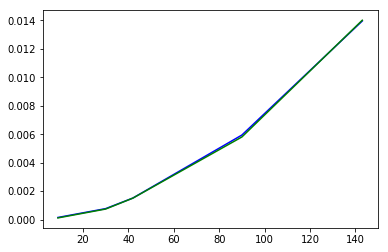

In [47]:
import time
%matplotlib inline
import matplotlib.pyplot as plt

maze_shape = [(3,3),(5,6),(6,7),(9,10),(11,13)]
poc = [2,3,4,5,6]

bruteforce_time = list()
backtracking_time = list()
maze_size=list()
for i in range(len(maze_shape)):
    width,height = maze_shape[i]
    _,_,_,maze_graph = maze.generate_maze(width,height,0,True,False,0.5,5,"",0)
    pieces_of_cheese,player1_location,_ = maze.generate_pieces_of_cheese(
        poc[i], width, height, False, None, None, False)
    start = time.time()
    bruteforceTSP(maze_graph,pieces_of_cheese,player1_location)
    bruteforce_time.append(time.time()-start)
    start = time.time()
    backtrackingTSP(maze_graph,pieces_of_cheese,player1_location)
    backtracking_time.append(time.time() - start)
    maze_size.append(width*height)
    
plt.plot(maze_size,bruteforce_time,color="blue")
plt.plot(maze_size,backtracking_time,color="green")

From the figure above we can see that backtracking search (green curve) is less affected by the total number of vertices when compared to the bruteforce search (blue curve), which corresponds to the expected result as the complexity of the backtracking algorithm is in average smaller than the one from the brute force algorithm.